In [1]:
import cv2 
from matplotlib import pyplot as plt

In [2]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torchvision.transforms as transforms

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
import numpy as np
import random
import os
import csv
import cv2
from frame import FLCDataset, visualize_transformed_image


In [3]:
train_0_ds = FLCDataset(r"C:\Users\lucyc\Desktop\face_loc_dataset\ds_0_train.csv", r"C:\Users\lucyc\Desktop\face_loc_dataset\imgs")
train_1_ds = FLCDataset(r"C:\Users\lucyc\Desktop\face_loc_dataset\ds_1_train.csv", r"C:\Users\lucyc\Desktop\face_loc_dataset\imgs")
train_2_ds = FLCDataset(r"C:\Users\lucyc\Desktop\face_loc_dataset\ds_2_train.csv", r"C:\Users\lucyc\Desktop\face_loc_dataset\imgs")
train_3_ds = FLCDataset(r"C:\Users\lucyc\Desktop\face_loc_dataset\ds_3_train.csv", r"C:\Users\lucyc\Desktop\face_loc_dataset\imgs")
train_4_ds = FLCDataset(r"C:\Users\lucyc\Desktop\face_loc_dataset\ds_4_train.csv", r"C:\Users\lucyc\Desktop\face_loc_dataset\imgs")
train_5_ds = FLCDataset(r"C:\Users\lucyc\Desktop\face_loc_dataset\ds_5_train.csv", r"C:\Users\lucyc\Desktop\face_loc_dataset\imgs")

train_0_loader = DataLoader(train_0_ds, batch_size=25, shuffle=True, num_workers=3)
train_1_loader = DataLoader(train_1_ds, batch_size=25, shuffle=True, num_workers=3)
train_2_loader = DataLoader(train_2_ds, batch_size=25, shuffle=True, num_workers=3)
train_3_loader = DataLoader(train_3_ds, batch_size=25, shuffle=True, num_workers=3)
train_4_loader = DataLoader(train_4_ds, batch_size=25, shuffle=True, num_workers=3)
train_5_loader = DataLoader(train_5_ds, batch_size=25, shuffle=True, num_workers=3)

val_0_ds = FLCDataset(r"C:\Users\lucyc\Desktop\face_loc_dataset\ds_0_val.csv", r"C:\Users\lucyc\Desktop\face_loc_dataset\imgs")
val_1_ds = FLCDataset(r"C:\Users\lucyc\Desktop\face_loc_dataset\ds_1_val.csv", r"C:\Users\lucyc\Desktop\face_loc_dataset\imgs")
val_2_ds = FLCDataset(r"C:\Users\lucyc\Desktop\face_loc_dataset\ds_2_val.csv", r"C:\Users\lucyc\Desktop\face_loc_dataset\imgs")
val_3_ds = FLCDataset(r"C:\Users\lucyc\Desktop\face_loc_dataset\ds_3_val.csv", r"C:\Users\lucyc\Desktop\face_loc_dataset\imgs")
val_4_ds = FLCDataset(r"C:\Users\lucyc\Desktop\face_loc_dataset\ds_4_val.csv", r"C:\Users\lucyc\Desktop\face_loc_dataset\imgs")
val_5_ds = FLCDataset(r"C:\Users\lucyc\Desktop\face_loc_dataset\ds_5_val.csv", r"C:\Users\lucyc\Desktop\face_loc_dataset\imgs")

val_0_loader = DataLoader(val_0_ds, batch_size=25, shuffle=True, num_workers=3)
val_1_loader = DataLoader(val_1_ds, batch_size=25, shuffle=True, num_workers=3)
val_2_loader = DataLoader(val_2_ds, batch_size=25, shuffle=True, num_workers=3)
val_3_loader = DataLoader(val_3_ds, batch_size=25, shuffle=True, num_workers=3)
val_4_loader = DataLoader(val_4_ds, batch_size=25, shuffle=True, num_workers=3)
val_5_loader = DataLoader(val_5_ds, batch_size=25, shuffle=True, num_workers=3)

# test_0_ds = FLCDataset(r"C:\Users\lucyc\Desktop\face_loc_dataset\ds_0_test.csv", r"C:\Users\lucyc\Desktop\face_loc_dataset\imgs")
# test_1_ds = FLCDataset(r"C:\Users\lucyc\Desktop\face_loc_dataset\ds_1_test.csv", r"C:\Users\lucyc\Desktop\face_loc_dataset\imgs")
# test_2_ds = FLCDataset(r"C:\Users\lucyc\Desktop\face_loc_dataset\ds_2_test.csv", r"C:\Users\lucyc\Desktop\face_loc_dataset\imgs")
# test_3_ds = FLCDataset(r"C:\Users\lucyc\Desktop\face_loc_dataset\ds_3_test.csv", r"C:\Users\lucyc\Desktop\face_loc_dataset\imgs")
# test_4_ds = FLCDataset(r"C:\Users\lucyc\Desktop\face_loc_dataset\ds_4_test.csv", r"C:\Users\lucyc\Desktop\face_loc_dataset\imgs")
# test_5_ds = FLCDataset(r"C:\Users\lucyc\Desktop\face_loc_dataset\ds_5_test.csv", r"C:\Users\lucyc\Desktop\face_loc_dataset\imgs")

# test_0_loader = DataLoader(test_0_ds, batch_size=25, shuffle=True, num_workers=3)
# test_1_loader = DataLoader(test_1_ds, batch_size=25, shuffle=True, num_workers=3)
# test_2_loader = DataLoader(test_2_ds, batch_size=25, shuffle=True, num_workers=3)
# test_3_loader = DataLoader(test_3_ds, batch_size=25, shuffle=True, num_workers=3)
# test_4_loader = DataLoader(test_4_ds, batch_size=25, shuffle=True, num_workers=3)
# test_5_loader = DataLoader(test_5_ds, batch_size=25, shuffle=True, num_workers=3)




In [4]:
a, b, c = next(iter(train_0_loader))

In [5]:
a.shape

torch.Size([25, 3, 12, 12])

In [6]:
def get_args(b):
    return [int(float(x)//1) for x in b.split()]

In [7]:
#visualize_transformed_image(a[6],get_args(b[6]),get_args(b[6]))

In [8]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "CPU")
print(device)
torch.cuda.empty_cache()

cuda:0


In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class PNet(nn.Module):
    def __init__(self):
        super(PNet, self).__init__()

        # Define network layers
        self.conv1 = nn.Conv2d(3, 10, 3)  # Input: 12x12x3, output: 10x10x10
        self.conv2 = nn.Conv2d(10, 16, 3) # Input: 5x5x10, output: 3x3x16
        self.conv3 = nn.Conv2d(16, 32, 3) # Input: 3x3x16, output: 1x1x32

        self.face_det = nn.Conv2d(32, 2, 1)  # face/not face classification
        self.bbox = nn.Conv2d(32, 4, 1)      # bounding box regression
        self.landmark = nn.Conv2d(32, 10, 1) # landmark localization

    def forward(self, x):
        # Forward pass
        x = F.relu(self.conv1(x))    # Activation following first convolution
        x = F.max_pool2d(x, 2)       # Max pooling (reducing spatial size to 5x5)
        x = F.relu(self.conv2(x))    # Activation following second convolution
        x = F.relu(self.conv3(x))    # Activation following third convolution

        # Applying convolution layers to the last feature map for different task
        facedet = self.face_det(x)   # Face detection
        bbox = self.bbox(x)          # Bounding box regression
        landmark = self.landmark(x)  # Landmark detection

        # Reshape the output tensors to remove extra dimensions
        facedet = facedet.view(facedet.size(0), -1)  # Reshape to (N, 2)
        bbox = bbox.view(bbox.size(0), -1)           # Reshape to (N, 4)
        landmark = landmark.view(landmark.size(0), -1)  # Reshape to (N, 10)

        return facedet, bbox, landmark




In [10]:
losscrs = torch.nn.CrossEntropyLoss()
class PNetLoss(nn.Module):
    def __init__(self):
        super(PNetLoss, self).__init__()
        # 初始化可以在这里完成，如果有必要的话

    def forward(self, facedet, bbox, landmark, label, ltypes):
        # 假设 'device' 是一个全局变量或已经事先定义好的
        loss_total = torch.tensor(0.0, device=device, requires_grad=True)

        face = torch.tensor([1.0, 0.0], device=device)
        not_face = torch.tensor([0.0, 1.0], device=device)
        
        for i, ltype in enumerate(ltypes):
            
            if ltype in ["2", "3", "4"]:
                # 对于类型2，只需要面部检测损失
                # 一个两个元素的tensor
                facedet_loss = losscrs(facedet[i].unsqueeze(0), torch.tensor([1], device=device))

                loss_total = loss_total + facedet_loss

            elif ltype in ["1", "0"]:
                # 对于类型1和0，计算边界框损失
                facedet_loss = losscrs(facedet[i].unsqueeze(0), torch.tensor([0], device=device))

                bbox_loss = F.mse_loss(bbox[i], label[i][:4])

                loss_total = loss_total + (0.5 * bbox_loss + facedet_loss)

            elif ltype == "5":
                # 对于类型3，计算关键点损失
                facedet_loss = losscrs(facedet[i].unsqueeze(0), torch.tensor([0], device=device))

                landmark_loss =F.mse_loss(landmark[i], label[i])
                
                loss_total = loss_total + (0.5 * landmark_loss + facedet_loss)

        loss_total = loss_total / len(ltypes)
        #loss_total = loss_total
        return loss_total

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class PNetLossN(nn.Module):
    def __init__(self):
        super(PNetLossN, self).__init__()
        # 初始化可以在这里完成，如果有必要的话
        self.losscrs = nn.CrossEntropyLoss()

    def facedet_loss_positive(self, facedet):
        # 假设`facedet`是一个二分类的logits输出，且正样本的类索引是0
        face_label = torch.zeros(facedet.shape[0], dtype=torch.long, device=facedet.device)
        return self.losscrs(facedet, face_label)

    def facedet_loss_negative(self, facedet):
        # 假设`facedet`是一个二分类的logits输出，且负样本的类索引是1
        not_face_label = torch.ones(facedet.shape[0], dtype=torch.long, device=facedet.device)
        return self.losscrs(facedet, not_face_label)

    def bbox_loss(self, bbox, label):
        return F.mse_loss(bbox, label)
    
    def landmark_loss(self, landmark, label):
        return F.mse_loss(landmark, label)

    def forward(self, facedet, bbox, landmark, labels, labels_type):

        if labels_type in ["2", "3", "4"]:
            loss = self.facedet_loss_negative(facedet)
            return loss.mean()

        elif labels_type in ["1", "0"]:
            loss = self.facedet_loss_positive(facedet) + 0.5*self.bbox_loss(bbox, labels)
            return loss.mean()

        elif labels_type == "5":
            loss = self.facedet_loss_positive(facedet) + 0.5*self.landmark_loss(landmark, labels)
            return loss.mean()



In [12]:
torch.cuda.empty_cache()
torch.autograd.set_detect_anomaly(True)

model = PNet()
print(model)

model.to(device)  # 将模型发送到GPU，如果有的话

# 定义损失函数和优化器
criterion = PNetLossN()
optimizer = optim.Adam(model.parameters(), lr=0.0001)


PNet(
  (conv1): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(10, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (face_det): Conv2d(32, 2, kernel_size=(1, 1), stride=(1, 1))
  (bbox): Conv2d(32, 4, kernel_size=(1, 1), stride=(1, 1))
  (landmark): Conv2d(32, 10, kernel_size=(1, 1), stride=(1, 1))
)


In [13]:
training_loss = []
validation_loss = []
torch.save(model, r"C:\Users\lucyc\Desktop\MTCNN_FaceLoc\pnet_temp\PNet_TT.pth")

def get_iters():
    train_iters = [iter(train_0_loader), iter(train_1_loader), iter(train_2_loader), iter(train_3_loader), iter(train_4_loader), iter(train_5_loader)]
    val_iters = [iter(val_0_loader), iter(val_1_loader), iter(val_2_loader), iter(val_3_loader), iter(val_4_loader), iter(val_5_loader)]
    return train_iters, val_iters

def get_loss(model, criterion, device, train_iters):
    loss = 0
    for iter in train_iters:
        inputs = next(iter)
        img_tensor = inputs[0].to(device)
        label = inputs[1].to(device)
        ltypes = inputs[2][0]

        facedet, bbox, landmark = model(img_tensor)
        loss =  loss + criterion(facedet, bbox, landmark, label, ltypes)
    return loss

for i in range(60):
    model.train()  # 设置模型为训练模式

    train_x = []
    train_loss_y = []

    train_loss_acc = 0.
    train_num = 0

    train_iters, val_iters = get_iters()

    for j in range(len(train_iters[0])):

        optimizer.zero_grad()  # 清除之前的梯度
        loss = get_loss(model, criterion, device, train_iters)
        # 反向传播和优化
        loss.backward()  # 反向传播计算当前的梯度

        optimizer.step()  # 更新参数

        train_loss_acc += loss.item()
        train_num += 1

        train_x.append(train_num)
        train_loss_y.append(loss.item())
        
        print(train_num,loss.item(),sum(train_loss_y[-200:])/200, train_num*128, len(train_iters[0]), i)
    
    training_loss.append((train_x, train_loss_y))

    model.eval()  # 设置模型为评估/测试模式

    val_loss_acc = 0
    val_num = 0
    with torch.no_grad():
        for j in range(len(val_iters[0])):
            loss = get_loss(model, criterion, device, val_iters)
            val_loss_acc += loss.item()
            val_num += 1

            print(val_num,loss.item(),val_loss_acc/val_num, val_num*128, len(val_iters[0]))
    
    validation_loss.append(val_loss_acc/val_num)


1 84.92510986328125 0.4246255493164062 128 1391 0
2 88.929931640625 0.8692752075195312 256 1391 0
3 86.77444458007812 1.303147430419922 384 1391 0
4 85.76445007324219 1.731969680786133 512 1391 0
5 89.42291259765625 2.179084243774414 640 1391 0
6 82.68179321289062 2.5924932098388673 768 1391 0
7 82.44459533691406 3.0047161865234373 896 1391 0
8 85.04629516601562 3.4299476623535154 1024 1391 0
9 92.1844253540039 3.8908697891235353 1152 1391 0
10 83.71880340576172 4.309463806152344 1280 1391 0
11 84.43537902832031 4.731640701293945 1408 1391 0
12 82.30438232421875 5.143162612915039 1536 1391 0
13 85.63663482666016 5.57134578704834 1664 1391 0
14 83.64678192138672 5.989579696655273 1792 1391 0
15 84.3630142211914 6.41139476776123 1920 1391 0
16 84.59553527832031 6.834372444152832 2048 1391 0
17 87.0059585571289 7.269402236938476 2176 1391 0
18 86.80934143066406 7.703448944091797 2304 1391 0
19 88.65616607666016 8.146729774475098 2432 1391 0
20 85.47289276123047 8.57409423828125 2560 1391 

: 

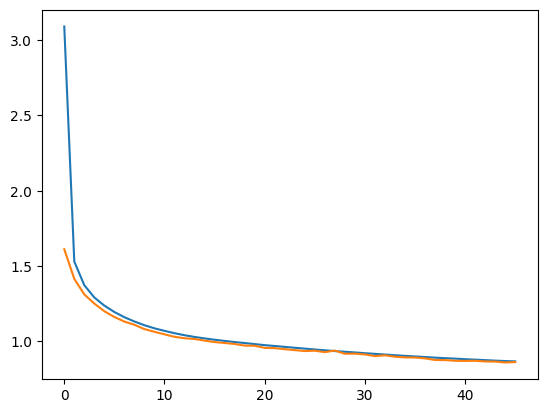

In [24]:
validation_loss
train_loss = [sum(x[1])/len(x[1]) for x in training_loss]
plt.plot(train_loss)
plt.plot(validation_loss)
plt.show()


In [29]:
# 保存模型
torch.save(model, 'face_loc_r_nn.pth')

In [125]:
# load model
model_trained = torch.load('face_loc_r_48.pth')
model_trained.eval()  # 设置模型为评估/测试模式


RNet(
  (conv1): Conv2d(3, 28, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(28, 48, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(48, 64, kernel_size=(2, 2), stride=(1, 1))
  (linear1): Linear(in_features=576, out_features=128, bias=True)
  (face_det): Linear(in_features=128, out_features=2, bias=True)
  (bbox): Linear(in_features=128, out_features=4, bias=True)
  (landmark): Linear(in_features=128, out_features=10, bias=True)
)

In [126]:
aa = iter(test_loader)

In [133]:

a, b, c = next(aa)

In [134]:
def get_argsn(b):
    return [int(float(x)//1) for x in b]

def is_face(i):
    if i == "0":
        return "face"
    if i == "1":
        return "face"
    if i == "2":
        return "not face"
    if i == "3":
        return "not face"
    if i == "4":
        return "not face"
    if i == "5":
        return "face"

In [135]:
right = 0
total = 0
for i in range(128):

    #visualize_transformed_image(a[i],get_argsn(b[i]),get_argsn(b[i]))
    #print(is_face(c[i]))

    with torch.no_grad():
        face_det, bbox, landmark = model_trained(a[i].to(device))
    probabilities = torch.nn.functional.softmax(face_det, dim=1)
    # print(bbox)
    # print(landmark)
    print(probabilities)

    # if probabilities[0][0] > probabilities[0][1]:
    #     print("face")
    #     visualize_transformed_image(a[i],get_argsn(bbox[0]),get_argsn(landmark[0]))   
    # else:
    #     print("not face")
    #     visualize_transformed_image(a[i],[0,0,0,0],None)
    if probabilities[0][0] > 0.8 and is_face(c[i]) == "face":
        right += 1
    if probabilities[0][0] <= 0.2 and is_face(c[i]) == "not face":
        right += 1

    total += 1

print("total: {}".format(total))
print("right: {}".format(right))
print("accuracy: {}".format(right/128))

tensor([[0.2195, 0.7805]], device='cuda:0')
tensor([[0.0763, 0.9237]], device='cuda:0')
tensor([[0.9904, 0.0096]], device='cuda:0')
tensor([[0.9565, 0.0435]], device='cuda:0')
tensor([[0.1128, 0.8872]], device='cuda:0')
tensor([[0.9132, 0.0868]], device='cuda:0')
tensor([[0.0495, 0.9505]], device='cuda:0')
tensor([[0.9941, 0.0059]], device='cuda:0')
tensor([[0.9540, 0.0460]], device='cuda:0')
tensor([[0.0084, 0.9916]], device='cuda:0')
tensor([[0.9477, 0.0523]], device='cuda:0')
tensor([[0.5705, 0.4295]], device='cuda:0')
tensor([[0.0867, 0.9133]], device='cuda:0')
tensor([[0.0132, 0.9868]], device='cuda:0')
tensor([[0.0058, 0.9942]], device='cuda:0')
tensor([[0.9909, 0.0091]], device='cuda:0')
tensor([[0.0097, 0.9903]], device='cuda:0')
tensor([[9.9956e-01, 4.4021e-04]], device='cuda:0')
tensor([[0.0084, 0.9916]], device='cuda:0')
tensor([[0.0187, 0.9813]], device='cuda:0')
tensor([[0.9603, 0.0397]], device='cuda:0')
tensor([[0.9953, 0.0047]], device='cuda:0')
tensor([[0.1848, 0.8152]